In [1]:
import halophot
import numpy as np
from halophot.halo_tools import halo_tpf
from tessbkgd.tessbkgd import bkgd_tpf
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import binary_dilation
import lightkurve as lk

In [4]:
fname = 'tess-s0011-2-1_187.791410_-57.113190_80x80_astrocut.fits.gz'
tpf = bkgd_tpf(fname)

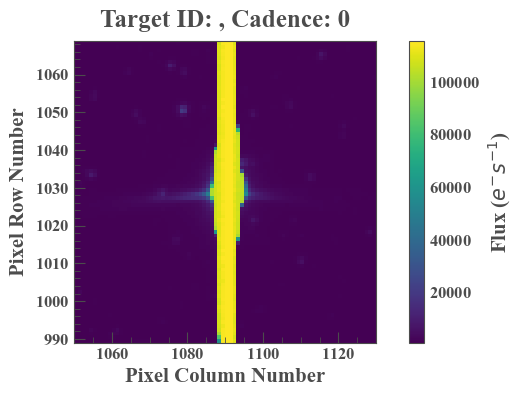

In [5]:
tpf.plot()

In [6]:
newbkgd = tpf.get_bkgd()

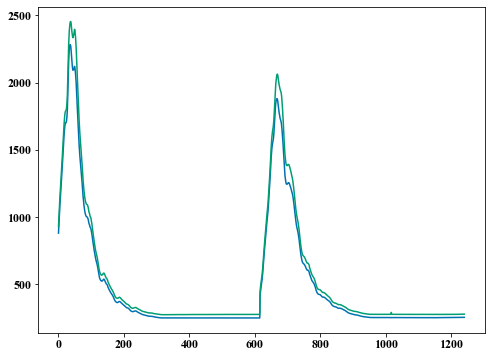

In [7]:
plt.plot(np.nanmin(np.nanmin(newbkgd,axis=1),axis=1))
plt.plot(np.nanmax(np.nanmax(newbkgd,axis=1),axis=1))
# plt.axvline(8200)
plt.show()

In [8]:
tpf.flux = tpf.flux + tpf.flux_bkg - newbkgd
tpf.flux_bkg = newbkgd

In [23]:
newmask = np.ones((tpf.flux.shape[1],tpf.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))

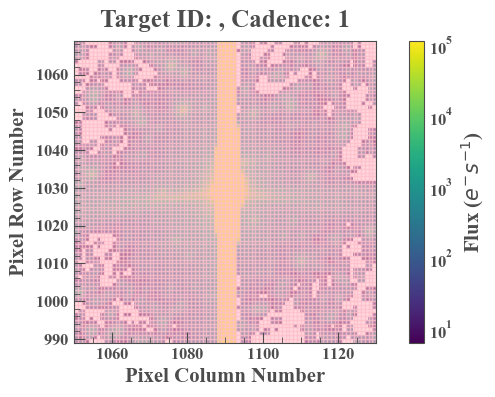

In [11]:
tpf.plot(frame=1,aperture_mask=newmask,scale='log')
plt.show()

In [24]:
# newmask[(xx<35).T] = False
# newmask[(xx<30).T] = True
# newmask[(yy<46).T] = True
# newmask[(yy>49).T] = True


newmask[(xx<20).T] = False
newmask[(xx>58).T] = False
newmask[(yy<26).T] = False
newmask[(yy>58).T] = False

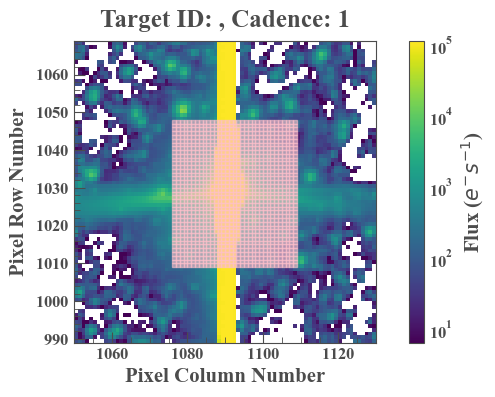

In [25]:
tpf.plot(frame=1,aperture_mask=newmask,scale='log')
plt.show()

In [14]:
tpf.__class__ = halo_tpf

In [15]:
%%time
weightmap, corr_lc = tpf.halo(objective='tv',verbose=True,mask = newmask, minflux = -500, thresh = 0.8)

Taking cadences from beginning to end
250 saturated pixels
Censored TPF
Subsampling by a factor of 1
Calculating weights
Using Analytic Derivatives
Calculated weights!
CPU times: user 7.98 s, sys: 2.68 s, total: 10.7 s
Wall time: 7.95 s


In [26]:
%%time
weightmap, corr_lc = tpf.halo(objective='tv',verbose=True,mask = newmask, minflux = -500, thresh = 0.8, deathstar = True)

TypeError: halo() got an unexpected keyword argument 'deathstar'

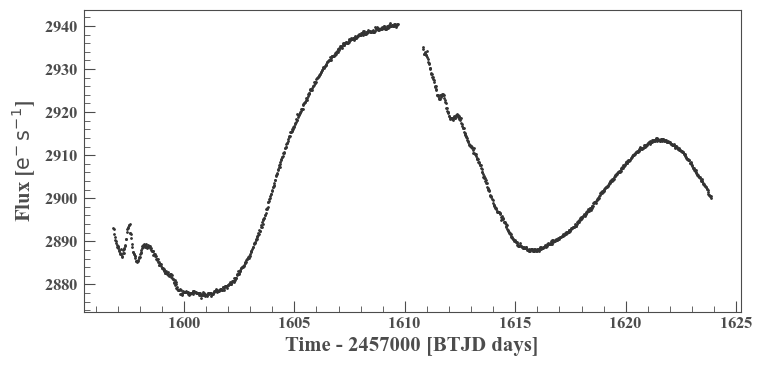

In [17]:
corr_lc.scatter();

In [18]:
from halophot.halo_tools import plot_weightmap

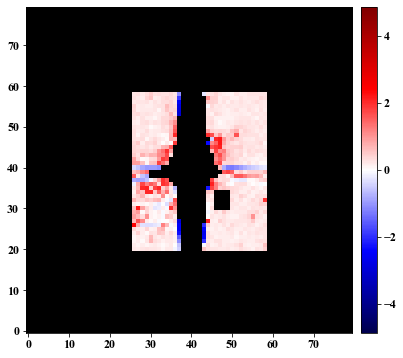

In [22]:
fig,ax = plt.subplots(1,1)
plot_weightmap(ax, weightmap['weightmap'],'gacrux')

In [19]:
weightmap

{'initial_cadence': 0,
 'final_cadence': 1240,
 'sat_pixels': 300,
 'weightmap': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}